# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data=pd.read_csv('D:/Ducument/Data Science/GitHub/APMAE4990-/data/hw2data.csv')
data.head(5)
data.shape

(225, 501)

b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [26]:
#standardize data
scale=StandardScaler()
data_T=scale.fit_transform(data)
data_T=pd.DataFrame(data_T)
#split into test&train
x=data_T.iloc[:,:500]
y=data_T.iloc[:,500]
[train,test]=train_test_split(data_T,test_size=0.2)
x_train=train.iloc[:,:500]
y_train=train.iloc[:,500]
x_test=test.iloc[:,:500]
y_test=test.iloc[:,500]
y_train.shape[0]

180

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

The optimal alpha is:	 7.65391938823e-05


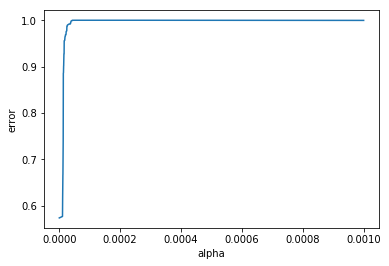

In [19]:
alpha=np.logspace(-8,-3,1000)
error=[]
for i in alpha:
    model=Lasso(alpha=i,max_iter = 10000)
    model.fit(x_train,y_train)
    error.append(model.score(x_test,y_test))
plt.plot(alpha,error)
plt.xlabel('alpha')
plt.ylabel('error')

#choose optimal alpha
alpha_optimal=alpha[np.argmax(error)]
print('The optimal alpha is:\t',alpha_optimal)

d) Plot the training perforamnce versus the testing performance, and observe where the test performance is
maximized. I've written an outline of the code you need.

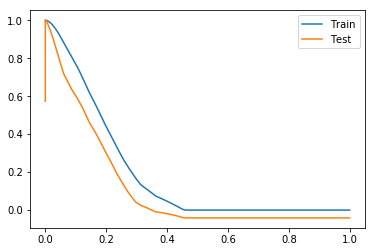

In [18]:
alphas=np.logspace(-8,-0,1000)
train_errors=[]
test_errors=[]
for i in alphas:
    model=Lasso(alpha=i,max_iter = 10000)
    model.fit(x_train,y_train)
    test_errors.append(model.score(x_test,y_test))
    train_errors.append(model.score(x_train,y_train))


plt.plot(alpha,train_errors,label="Train")
plt.plot(alpha,test_errors,label='Test')
plt.legend(loc='best', shadow=False, scatterpoints=1)

The optimal alpha for testing data is:	 7.65391938823e-05
The optimal alpha for testing data is:	 7.65391938823e-05


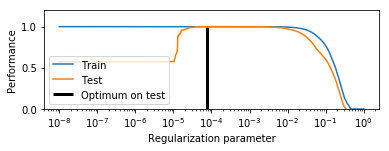

In [17]:
print('The optimal alpha for testing data is:\t',alpha_optim)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(2, 1, 1)
# Fill these in
alphas=np.logspace(-8,-0,1000)
train_errors=[]
test_errors=[]
alpha_optim=0
for i in alphas:
    model=Lasso(alpha=i,max_iter = 10000)
    model.fit(x_train,y_train)
    test_errors.append(model.score(x_test,y_test))
    train_errors.append(model.score(x_train,y_train))

alpha_optim = alphas[np.argmax(test_errors)]
print('The optimal alpha for testing data is:\t',alpha_optim)

plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()


e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

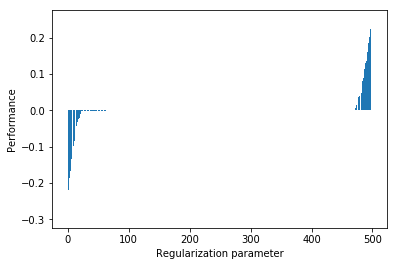

In [25]:
regr = Lasso(alpha=alpha_optim)
regr.fit(x_train,y_train)
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.bar(range(500),np.sort(regr.coef_))
plt.show()

Because LASSO uses L1 norm of coefficients as penalty. The minimizing of SSE+alpha*|β| could be transformed into minimizing SSE, which subjects to |β|<s. Since |β|<s is a square restriction, SSE function is more likely to hit the point on one of coordinates. It leads to many zero coefficients.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

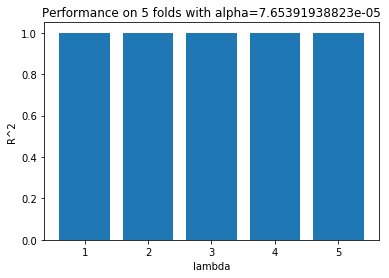

The scores for optimal alpha is: 
 [ 0.99999512  0.99996926  0.99999788  0.99999302  0.99999645]

The scores for random subset 1 is:
 [ 0.99998912  0.99999261  0.99998142  0.99999655  0.9999917 ]

The scores for random subset 2 is:
 [ 0.99998663  0.99999563  0.99989167  0.99999644  0.99999816]

The scores for random subset 3 is:
 [ 0.99999419  0.99998438  0.99993896  0.9999983   0.99996161]

The scores for random subset 4 is:
 [ 0.99998836  0.99999903  0.99998888  0.99999422  0.99999628]


In [40]:
from sklearn.model_selection import cross_val_score
regr = Lasso(alpha = alpha_optim, max_iter = 10000)
scores = cross_val_score(regr, x, y, cv=5)
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with alpha=' + str(alpha_optim))
plt.bar(range(1,6),scores)
plt.show()
print ("The scores for optimal alpha is: \n",scores)

#shuffle data
from sklearn.utils import shuffle
for m in range(4):
    x, y = shuffle(x, y)
    error = cross_val_score(regr, x, y, cv=5)
    print ("\nThe scores for random subset %s is:\n" %(m+1),error)

We can see that R square of all folds are very close to 1. After shuffling the data, they are still very close to 1. Hence, the optimal alpha should be a good choice.

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [42]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = x.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(x)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

D:\Software\Program\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [62]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(x.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(x.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)


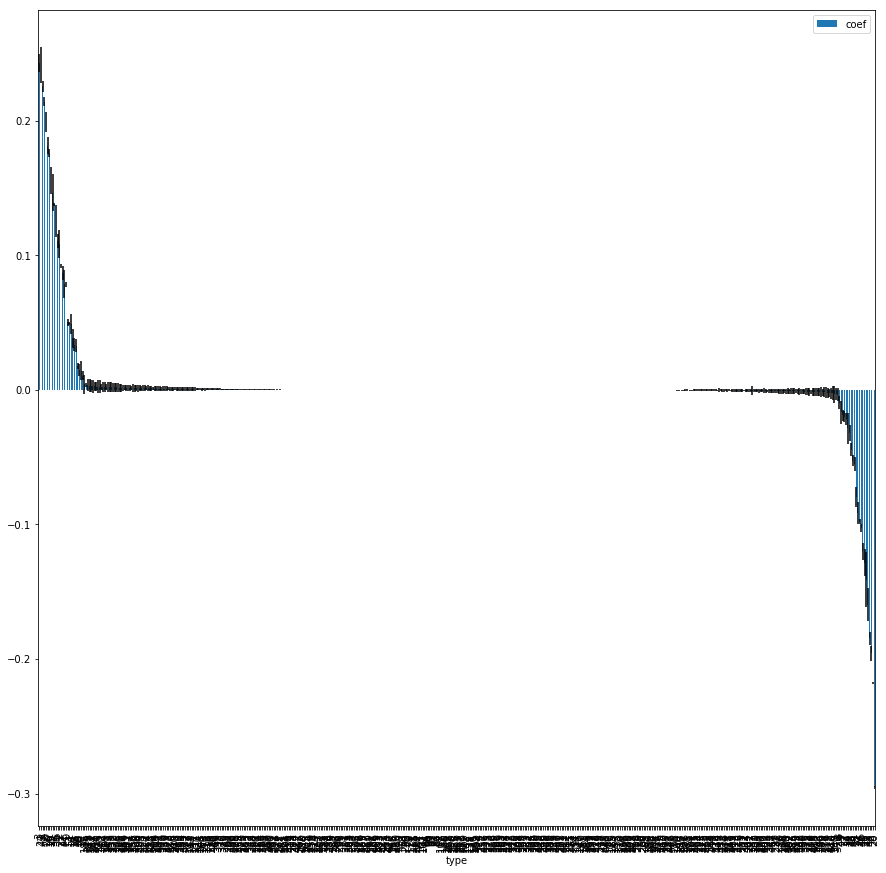

In [68]:
dfCoeffs = pd.DataFrame({'type':x.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
#dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
dfCoeffs
yerr_vals = dfCoeffs_sorted['std'].values

dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))